# PFM: Cleaning Data SNP

## **1. Importar librerías y datos**


In [1]:
# Importamos las librerías
### Escribe aquí tu código ###
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
import seaborn as sns

# Cargamos el conjunto de datos de entrada
### Escribe aquí tu código ###
dataset = pd.read_csv('df_Tenerife_Meteo_28.14_-16.46_2019.csv', delimiter=';', encoding='latin-1')

## **2. Comprender y limpiar los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

* **1. ¿Cuántos datos hay?** **¿Cuántos atributos hay en los datos?**

In [2]:
# Filasxcolumnas de los datos
### Escribe aquí tu código ###
dataset.shape


(52839, 21)

In [3]:
# Observa las primeras 5 filas de los datos
### Escribe aquí tu código ###
dataset.head(5)

,PeriodEnd,PeriodStart,Period,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,...,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
0,2018-12-31T00:20:00Z,2018-12-31T00:10:00Z,PT10M,16.9,0.07,70,0.0,11.5,0,0,...,0,0,0,15.3,70.2,0.0,1007.0,90,2.9,167
1,2018-12-31T00:30:00Z,2018-12-31T00:20:00Z,PT10M,17.0,0.07,65,0.0,11.6,0,0,...,0,0,0,15.3,70.4,0.0,1007.0,91,2.9,169
2,2018-12-31T00:40:00Z,2018-12-31T00:30:00Z,PT10M,17.1,0.07,57,0.0,11.7,0,0,...,0,0,0,15.3,70.6,0.0,1007.0,92,3.0,171
3,2018-12-31T00:50:00Z,2018-12-31T00:40:00Z,PT10M,17.1,0.07,46,0.0,11.8,0,0,...,0,0,0,15.4,70.8,0.0,1007.0,93,3.0,173
4,2018-12-31T01:00:00Z,2018-12-31T00:50:00Z,PT10M,17.2,0.07,29,0.0,11.9,0,0,...,0,0,0,15.4,71.0,0.0,1007.1,94,3.0,174


In [4]:
# Observa las últimas 5 filas de los datos
### Escribe aquí tu código ###
dataset.tail(5)


,PeriodEnd,PeriodStart,Period,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,...,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
52834,2020-01-01T22:00:00Z,2020-01-01T21:50:00Z,PT10M,12.6,0.07,95,31.0,5.8,0,0,...,0,0,0,7.3,63.3,0.0,955.6,53,4.1,136
52835,2020-01-01T22:10:00Z,2020-01-01T22:00:00Z,PT10M,12.5,0.07,94,31.0,5.7,0,0,...,0,0,0,7.1,63.0,0.0,955.6,53,4.1,139
52836,2020-01-01T22:20:00Z,2020-01-01T22:10:00Z,PT10M,12.5,0.07,93,31.0,5.5,0,0,...,0,0,0,7.0,62.7,0.0,955.7,52,3.9,141
52837,2020-01-01T22:30:00Z,2020-01-01T22:20:00Z,PT10M,12.4,0.07,92,31.0,5.4,0,0,...,0,0,0,6.9,62.4,0.0,955.7,51,3.7,143
52838,2020-01-01T22:40:00Z,2020-01-01T22:30:00Z,PT10M,12.3,0.07,90,31.0,5.3,0,0,...,0,0,0,6.7,62.1,0.0,955.8,49,3.6,145


**2. ¿Qué significan?** 

In [5]:
# Formato de los datos
### Escribe aquí tu código ###
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52839 entries, 0 to 52838
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PeriodEnd          52839 non-null  object 
 1   PeriodStart        52839 non-null  object 
 2   Period             52839 non-null  object 
 3   AirTemp            52839 non-null  float64
 4   AlbedoDaily        52839 non-null  float64
 5   Azimuth            52839 non-null  int64  
 6   CloudOpacity       52839 non-null  float64
 7   DewpointTemp       52839 non-null  float64
 8   Dhi                52839 non-null  int64  
 9   Dni                52839 non-null  int64  
 10  Ebh                52839 non-null  int64  
 11  Ghi                52839 non-null  int64  
 12  GtiFixedTilt       52839 non-null  int64  
 13  GtiTracking        52839 non-null  int64  
 14  PrecipitableWater  52839 non-null  float64
 15  RelativeHumidity   52839 non-null  float64
 16  SnowDepth          528

**4. Elimino filas sobrantes** 

In [6]:
dataset = dataset.drop(dataset.index[:142])
dataset = dataset.drop(dataset.index[-137:])
dataset = dataset.drop(['PeriodStart'],axis=1)
print(dataset)

                  PeriodEnd Period  AirTemp  AlbedoDaily  Azimuth  \
142    2019-01-01T00:00:00Z  PT10M     16.7         0.07       77   
143    2019-01-01T00:10:00Z  PT10M     16.7         0.07       74   
144    2019-01-01T00:20:00Z  PT10M     16.8         0.07       70   
145    2019-01-01T00:30:00Z  PT10M     17.0         0.07       65   
146    2019-01-01T00:40:00Z  PT10M     17.1         0.07       57   
...                     ...    ...      ...          ...      ...   
52697  2019-12-31T23:10:00Z  PT10M     14.0         0.07       87   
52698  2019-12-31T23:20:00Z  PT10M     13.9         0.07       85   
52699  2019-12-31T23:30:00Z  PT10M     13.9         0.07       84   
52700  2019-12-31T23:40:00Z  PT10M     13.9         0.07       82   
52701  2019-12-31T23:50:00Z  PT10M     13.9         0.07       80   

       CloudOpacity  DewpointTemp  Dhi  Dni  Ebh  Ghi  GtiFixedTilt  \
142             0.0           7.5    0    0    0    0             0   
143             0.0          

**5. Eliminamos la zona horaria y convertimos time_series de objeto a time format** 

In [7]:
# Transformo time_series a formato de fecha y hora con .to_datetime()
dataset['PeriodEnd'] = pd.to_datetime(dataset['PeriodEnd'], format='%Y-%m-%dT%H:%M:%S%z')
# Elimino la zona horaria
dataset['PeriodEnd'] = dataset['PeriodEnd'].dt.tz_localize(None)
# Convierto en el index a la fecha y hora 'time_series'
dataset = dataset.set_index('PeriodEnd')

print(dataset)

                    Period  AirTemp  AlbedoDaily  Azimuth  CloudOpacity  \
PeriodEnd                                                                 
2019-01-01 00:00:00  PT10M     16.7         0.07       77           0.0   
2019-01-01 00:10:00  PT10M     16.7         0.07       74           0.0   
2019-01-01 00:20:00  PT10M     16.8         0.07       70           0.0   
2019-01-01 00:30:00  PT10M     17.0         0.07       65           0.0   
2019-01-01 00:40:00  PT10M     17.1         0.07       57           0.0   
...                    ...      ...          ...      ...           ...   
2019-12-31 23:10:00  PT10M     14.0         0.07       87           0.0   
2019-12-31 23:20:00  PT10M     13.9         0.07       85           0.0   
2019-12-31 23:30:00  PT10M     13.9         0.07       84           0.0   
2019-12-31 23:40:00  PT10M     13.9         0.07       82           0.0   
2019-12-31 23:50:00  PT10M     13.9         0.07       80           0.0   

                     Dew

In [8]:
dataset.dtypes

Period                object
AirTemp              float64
AlbedoDaily          float64
Azimuth                int64
CloudOpacity         float64
DewpointTemp         float64
Dhi                    int64
Dni                    int64
Ebh                    int64
Ghi                    int64
GtiFixedTilt           int64
GtiTracking            int64
PrecipitableWater    float64
RelativeHumidity     float64
SnowDepth            float64
SurfacePressure      float64
WindDirection10m       int64
WindSpeed10m         float64
Zenith                 int64
dtype: object

**6. Muestra por pantalla el resumen estadístico del conjunto de datos de entrada** 

In [9]:
dataset.describe()

,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.0,52560.000000,52560.000000,52560.000000,52560.000000
mean,18.629581,0.061071,0.041001,6.589996,12.648796,79.291686,260.273668,164.534342,243.825247,261.477645,311.807249,16.125325,69.661440,0.0,974.013411,68.702987,5.916153,89.747260
std,2.798637,0.004987,98.223910,14.326190,2.655090,117.175923,354.960690,263.461755,322.748404,347.072080,388.585274,4.956180,12.983715,0.0,29.473504,81.393103,2.537987,41.723464
min,11.900000,0.050000,-180.000000,0.000000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,21.100000,0.0,940.600000,0.000000,0.000000,5.000000
25%,16.900000,0.060000,-90.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.900000,63.200000,0.0,947.800000,30.000000,4.200000,54.000000
50%,18.100000,0.060000,0.000000,0.000000,12.900000,4.000000,0.000000,0.000000,5.000000,5.000000,4.000000,15.600000,72.300000,0.0,951.000000,41.000000,6.100000,90.000000
75%,20.000000,0.060000,90.000000,3.800000,14.300000,117.000000,605.000000,277.000000,480.000000,520.000000,698.000000,18.400000,79.100000,0.0,1006.800000,57.000000,7.700000,125.000000
max,31.100000,0.080000,180.000000,99.100000,18.900000,658.000000,1014.000000,997.000000,1090.000000,1110.000000,1092.000000,40.500000,95.600000,0.0,1017.700000,360.000000,14.300000,175.000000


In [10]:
print('El Dataset tiene' , dataset.shape[0], 'filas')
print('El Dataset tiene'  , dataset.shape[1], 'columnas')

El Dataset tiene 52560 filas
El Dataset tiene 19 columnas


**7. ¿Falta algún dato? 
De ser así, indica cuántos y en que atributo(s)** 


In [11]:
# Comprobar si falta algún dato y en qué atributo
### Escribe aquí tu código ###
dataset.isna().sum()


Period               0
AirTemp              0
AlbedoDaily          0
Azimuth              0
CloudOpacity         0
DewpointTemp         0
Dhi                  0
Dni                  0
Ebh                  0
Ghi                  0
GtiFixedTilt         0
GtiTracking          0
PrecipitableWater    0
RelativeHumidity     0
SnowDepth            0
SurfacePressure      0
WindDirection10m     0
WindSpeed10m         0
Zenith               0
dtype: int64

## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

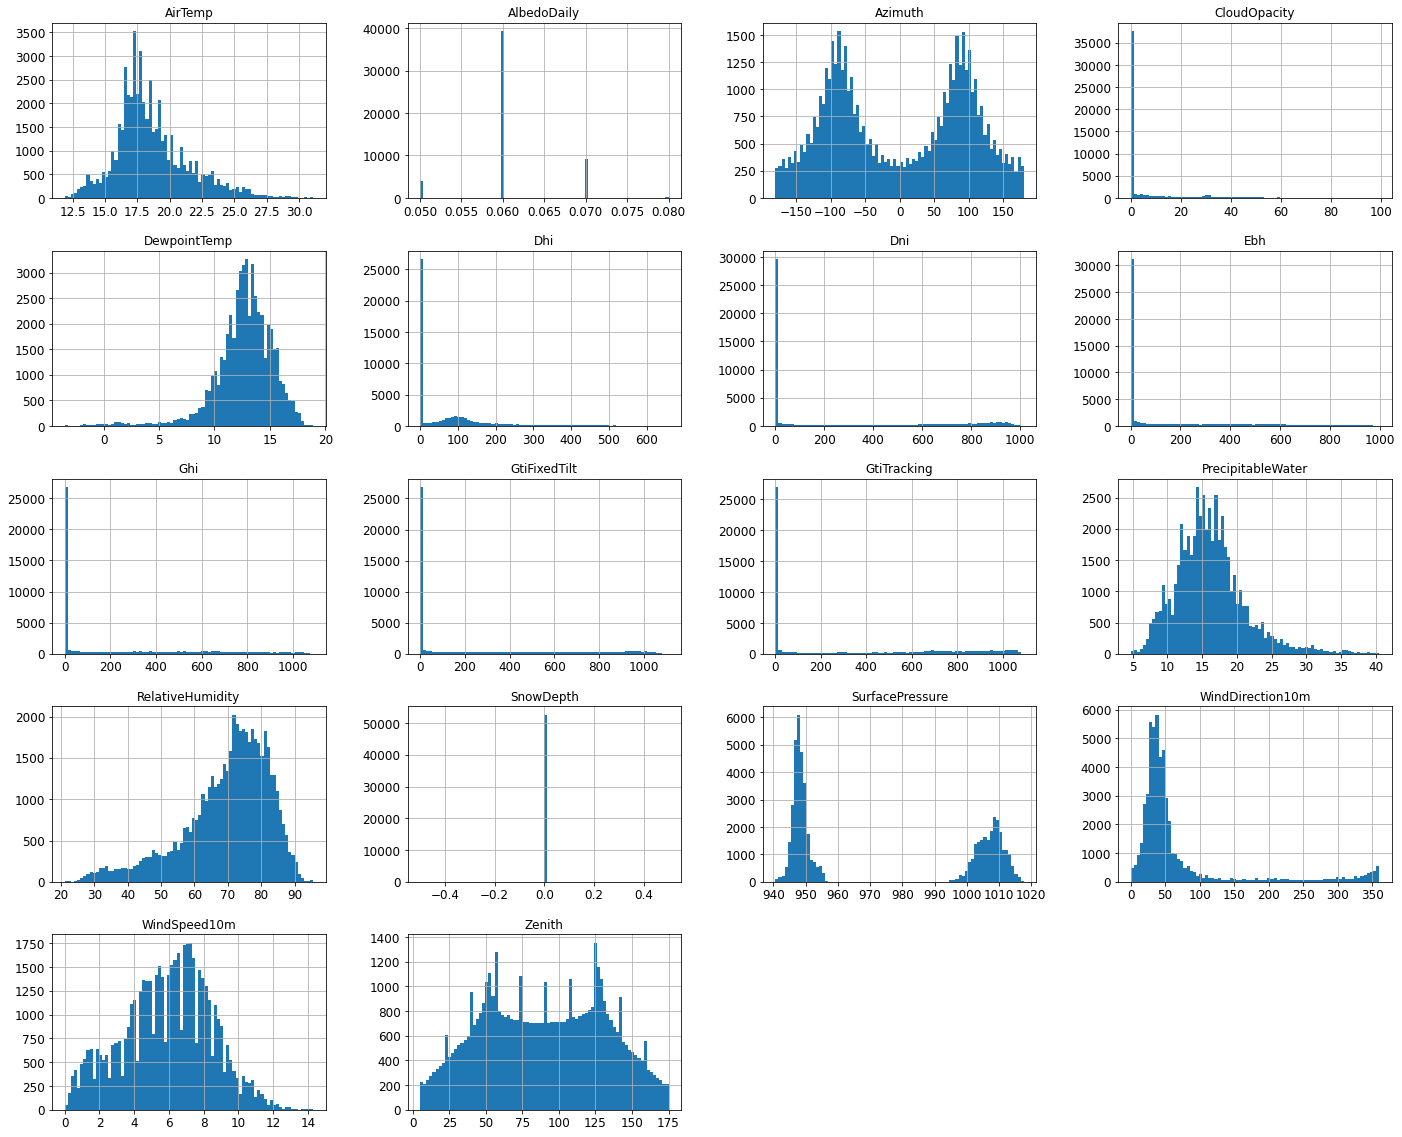

In [12]:
### Escribe aquí tu código ###
histograma=dataset.hist(xlabelsize=12, ylabelsize=12, bins=80, figsize=(24, 20));
#histograma=dataset.plot(kind='hist', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(30,25), sharex=False,fontsize=8, stacked=True)

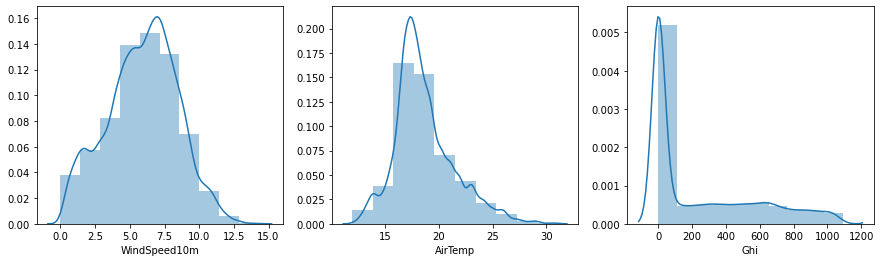

In [13]:
# Velocidad del viento, temperatura del aire y radiación solar
f, ax = plt.subplots(1,3,figsize=(15,4))
vis1 = sns.distplot(dataset["WindSpeed10m"],bins=10, ax= ax[0])
vis2 = sns.distplot(dataset["AirTemp"],bins=10, ax=ax[1])
vis3 = sns.distplot(dataset["Ghi"],bins=10, ax=ax[2])

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

LinAlgError: singular matrix

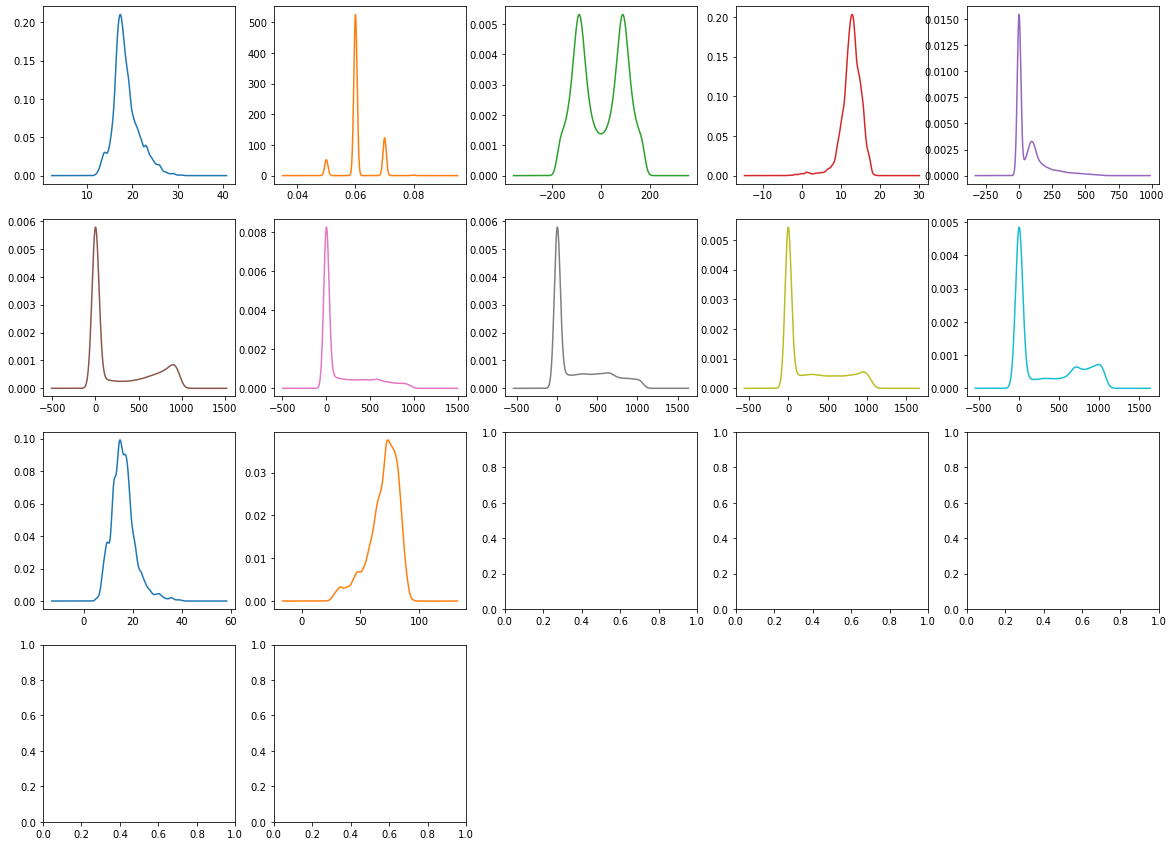

In [14]:
### Escribe aquí tu código ###
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 5), figsize=(20, 15), sharex=False,
                        fontsize=8, stacked=True)

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Qué atributo llama la atención por sus valores atípicos?**

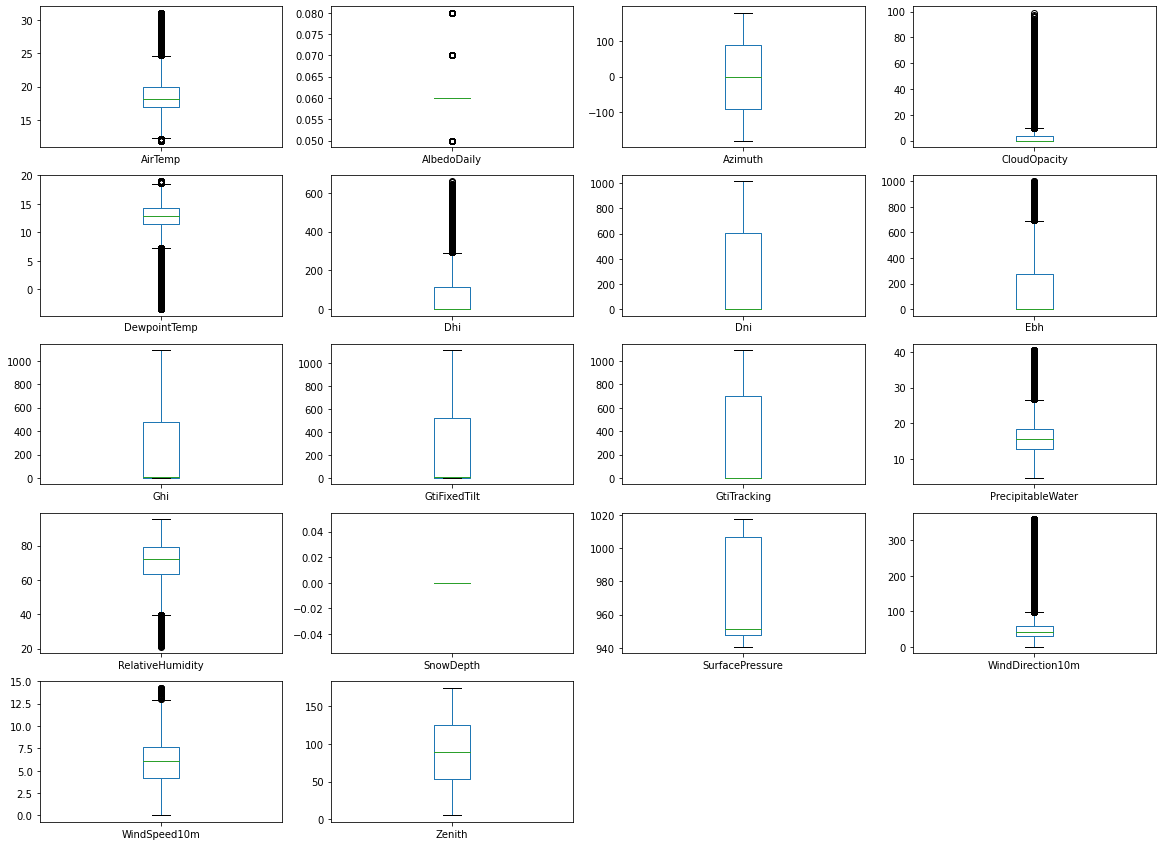

In [32]:
### Escribe aquí tu código ###
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(5, 4), figsize=(20, 15), sharex=False,
                                 sharey=False, fontsize=10)

**4. Matriz de correlación** 

Calcula y visualiza la matriz de correlación
* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

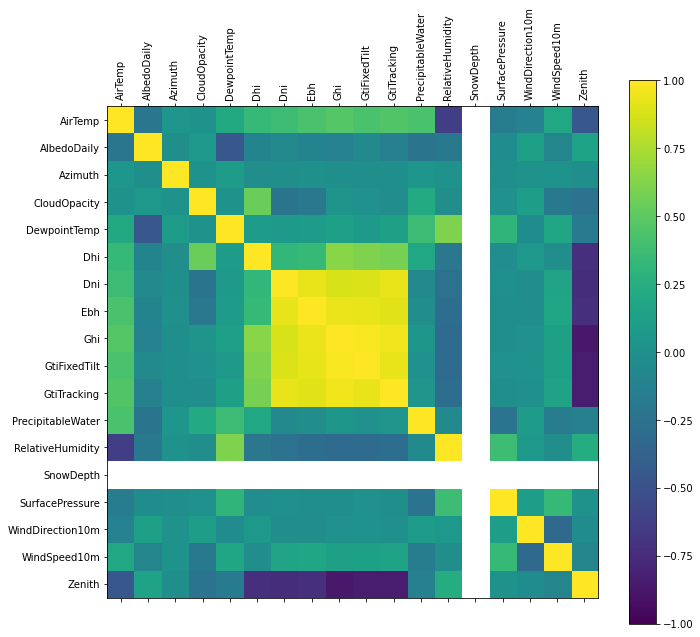

In [33]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 


# Matriz de correlación (Descomentar cuando se ejecute)

fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 18, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
plt.show()

In [34]:
# Guardamos el archivo en formato CSV y Pickle
import pickle

with open('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean.pkl', 'wb') as f:
    pickle.dump(dataset, f)

dataset.to_csv('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean.csv', index=True)
